# carrega bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# carregar base de dados

In [2]:
# carregando dados pela biblioteca do scikit-learn
X, y = load_boston(return_X_y=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y_cat = []
for yi in y:
    if yi < 20:
        y_cat.append('cheap')
    elif yi < 35:
        y_cat.append('fair')
    else:
        y_cat.append('expensive')
# to visualize stats let's put numpy into dataframe format
dataset = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1),
                  columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
dataset['cat'] = y_cat

/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [3]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,cat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0,fair
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6,fair
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7,fair
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4,fair
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2,expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4,fair
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6,fair
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9,fair
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0,fair


# visualizar dados

In [4]:
# tipos de colunas
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
cat         object
dtype: object

In [5]:
# resumo numérico dos dados (média, desvio padrão, mínimo, máximo)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,-8.787437e-17,-6.343191e-16,-2.682911e-15,4.701992e-16,2.490322e-15,-1.145230e-14,-1.407855e-15,9.210902e-16,5.441409e-16,-8.868619e-16,-9.205636e-15,8.163101e-15,-3.370163e-16,22.532806
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,9.197104
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,5.000000
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,17.025000
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,21.200000
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,25.000000
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,50.000000


In [6]:
# número de exemplos em cada classe
dataset.groupby('cat').size()

cat
cheap        210
expensive     48
fair         248
dtype: int64

# analisar dados

In [7]:
# separar dados entre treino e teste
train, test = train_test_split(dataset, test_size = 0.4, random_state = 42)

In [8]:
# compara as bases de treino
print('Treino:')
print(train.describe())
print(train.groupby('cat').size())

Treino:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    -0.031230    0.040911   -0.016981   -0.012467   -0.015503    0.085540   
std      0.922363    1.017924    1.019142    0.980143    0.997482    1.044858   
min     -0.419463   -0.487722   -1.448410   -0.272599   -1.465882   -3.450002   
25%     -0.411334   -0.487722   -0.905627   -0.272599   -0.921667   -0.554384   
50%     -0.391193   -0.487722   -0.211099   -0.272599   -0.144217   -0.079260   
75%     -0.066301    0.370669    1.015999   -0.272599    0.628913    0.621672   
max      9.933931    3.589637    2.422565    3.668398    2.732346    3.555044   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    -0.020643    0.026922   -0.025219   -0.027518   -0.099075    0.009937   
std      0.988679  

In [9]:
# compara as bases de treino
print('Test:')
print(test.describe())
print(test.groupby('cat').size())

Test:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  203.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean     0.046614   -0.061064    0.025346    0.018608    0.023141   -0.127677   
std      1.108777    0.974458    0.975212    1.033491    1.008227    0.919458   
min     -0.419782   -0.487722   -1.557842   -0.272599   -1.405414   -3.880249   
25%     -0.410410   -0.487722   -0.762636   -0.272599   -0.800731   -0.586439   
50%     -0.389285   -0.487722   -0.211099   -0.272599   -0.144217   -0.157616   
75%      0.067505   -0.487722    1.015999   -0.272599    0.598679    0.274768   
max      8.136884    3.804234    2.422565    3.668398    2.732346    3.476688   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  203.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean     0.030812   -0.040184    0.037643    0.041073    0.147880   -0.014832   
std      1.020768    

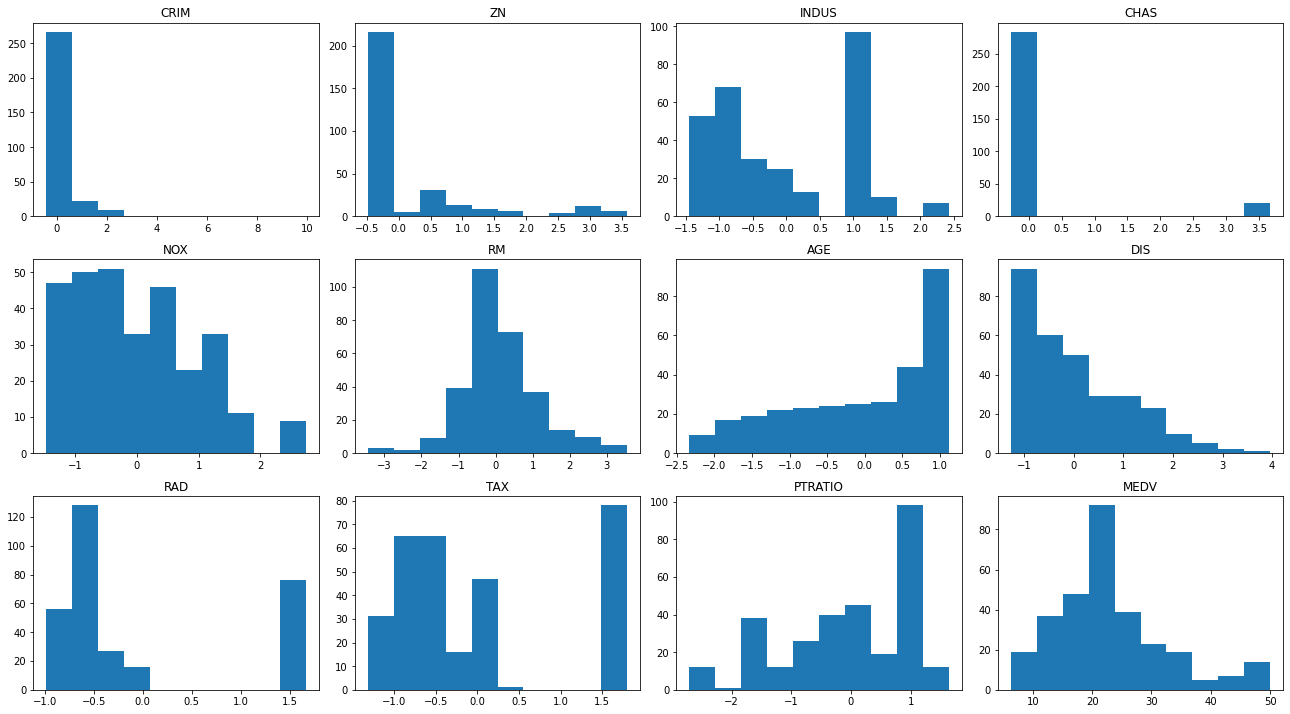

In [10]:
# histograms
n_bins = 10
fn = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','MEDV']
k = 0
fig, axs = plt.subplots(3, 4, figsize=(18,10))
for i in range(3):
    for j in range(4):
        axs[i,j].hist(train[fn[k]], bins = n_bins)
        axs[i,j].set_title(fn[k])
        k += 1
# add some spacing between subplots
fig.tight_layout(pad=1.0);

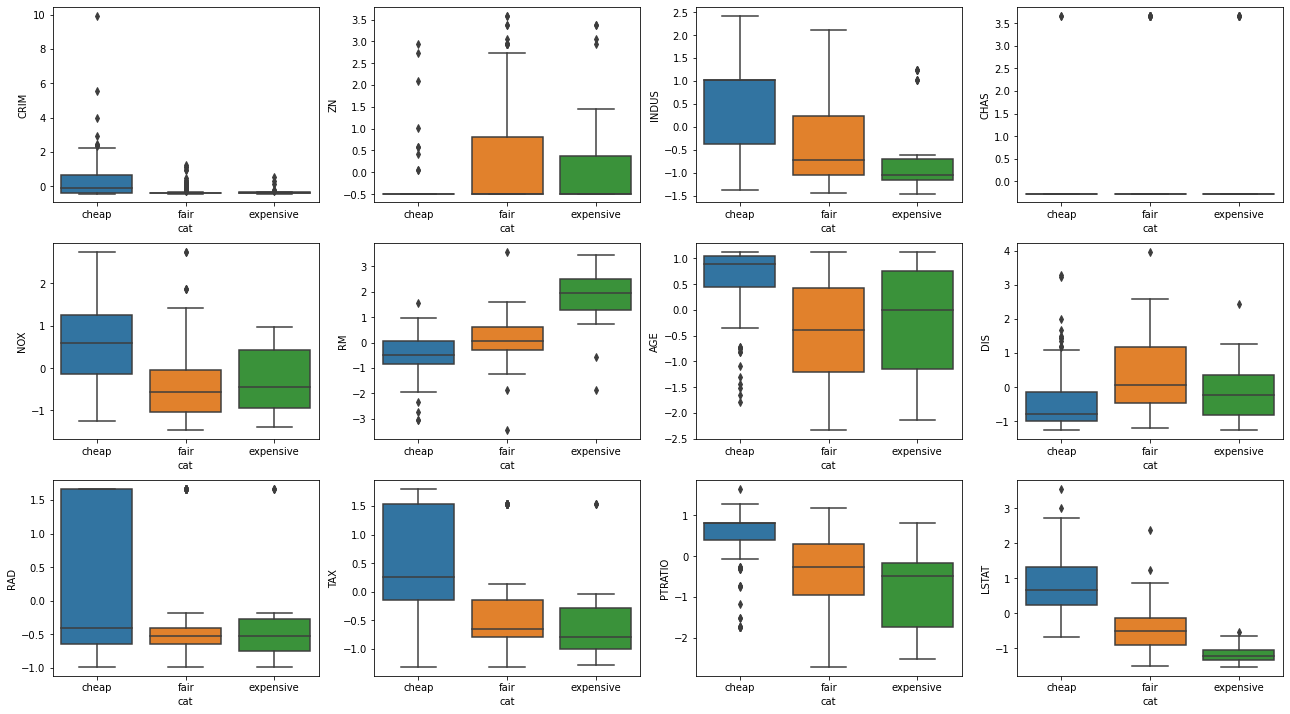

In [11]:
# boxplots using seaborn
k = 0
fig, axs = plt.subplots(3, 4, figsize=(18,10))
fn = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']
cn = ['cheap', 'fair', 'expensive']
for i in range(3):
    for j in range(4):
        sns.boxplot(x = 'cat', y = fn[k], data = train, order = cn, ax = axs[i,j])
        k += 1
# add some spacing between subplots
fig.tight_layout(pad=1.0);

/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rmaia/miniconda3/envs/dim0613/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

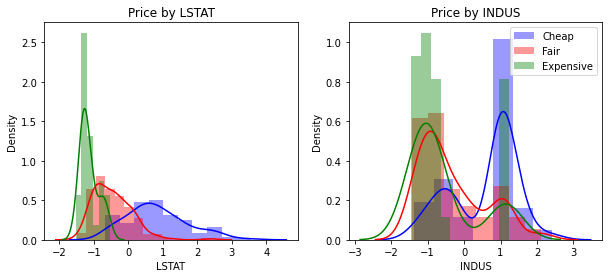

In [12]:
# right off the bat, we see that petal length/width can separate setosa from the others
# histogram by species
cheap_crim = train.loc[train.cat=='cheap', 'LSTAT']
fair_crim = train.loc[train.cat=='fair', 'LSTAT']
expensive_crim = train.loc[train.cat=='expensive', 'LSTAT']

cheap_indus = train.loc[train.cat=='cheap', 'INDUS']
fair_indus = train.loc[train.cat=='fair', 'INDUS']
expensive_indus = train.loc[train.cat=='expensive', 'INDUS']

fig, axs = plt.subplots(1, 2)
# set figure size
fig.set_size_inches(10,4)
ax1 = sns.distplot(cheap_crim, color="blue", label="Cheap", ax = axs[0])
ax1.set_title('Price by LSTAT')
ax1 = sns.distplot(fair_crim, color="red", label="Fair", ax = axs[0])
ax1 = sns.distplot(expensive_crim, color="green", label="Expensive", ax = axs[0])

ax2 = sns.distplot(cheap_indus, color="blue", label="Cheap", ax = axs[1])
ax2.set_title('Price by INDUS')
ax2 = sns.distplot(fair_indus, color="red", label="Fair", ax = axs[1])
ax2 = sns.distplot(expensive_indus, color="green", label="Expensive", ax = axs[1])

plt.legend()

# treinamento

In [13]:
# separar entradas e saídas
X_train = train[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']]
y_train = train.cat
X_test = test[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']]
y_test = test.cat

In [14]:
# MODELO 1: Kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [15]:
# MODELO 2: HC
hc = AgglomerativeClustering(n_clusters=None,
                             compute_full_tree='auto',
                             linkage='ward',
                             distance_threshold=0.001,
                             compute_distances=True).fit(X)

In [16]:
# MODELO 3: GMM
gmm = GaussianMixture(n_components=3,
                      covariance_type='full',
                      init_params='kmeans',
                      verbose=0,
                      verbose_interval=10).fit(X)

# teste dos modelos

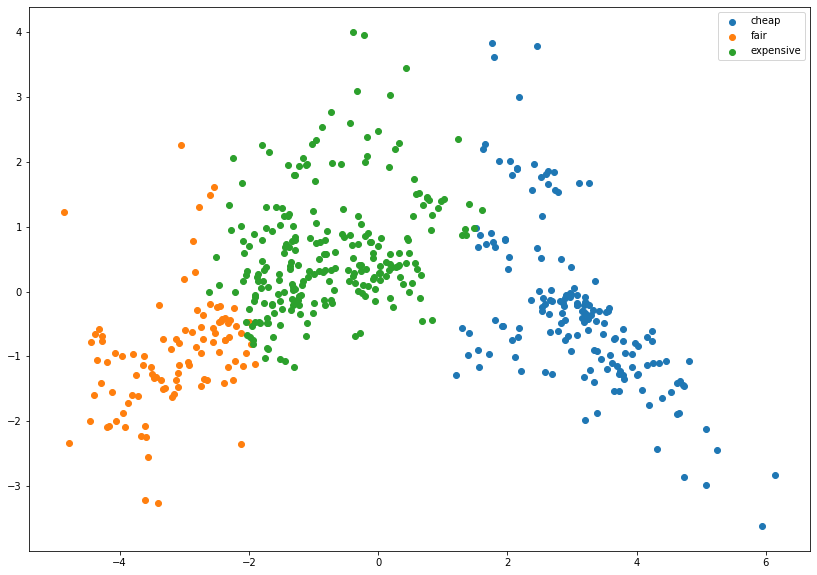

In [17]:
y_hat = kmeans.predict(X)
X_2D = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots(figsize=(14,10))
for c in range(len(cn)):
    ax.scatter(X_2D[np.where(y_hat==c),0],X_2D[np.where(y_hat==c),1], label=cn[c])
plt.legend()
plt.show()

(506,)


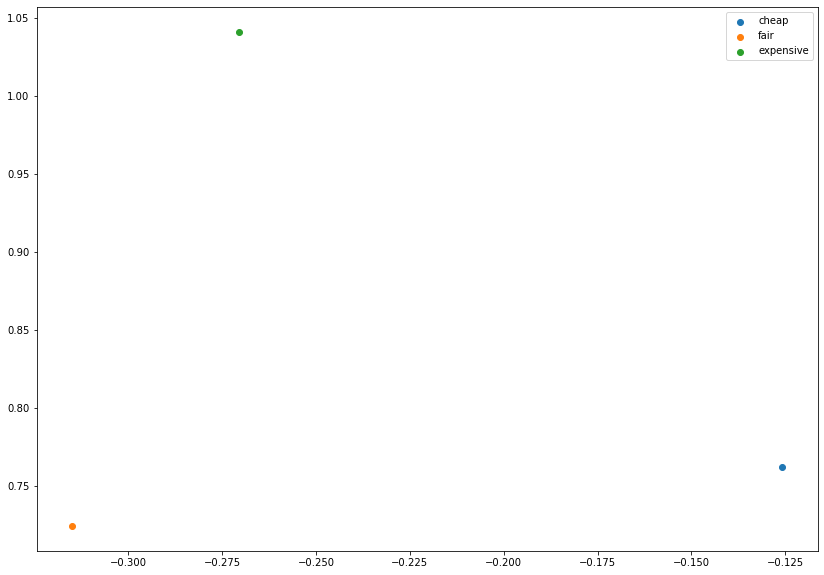

In [18]:
y_hat = AgglomerativeClustering(n_clusters=None,
                             compute_full_tree='auto',
                             linkage='ward',
                             distance_threshold=0.001,
                             compute_distances=True).fit_predict(X)
print(y_hat.shape)
X_2D = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots(figsize=(14,10))
for c in range(len(cn)):
    ax.scatter(X_2D[np.where(y_hat==c),0],X_2D[np.where(y_hat==c),1], label=cn[c])
plt.legend()
plt.show()

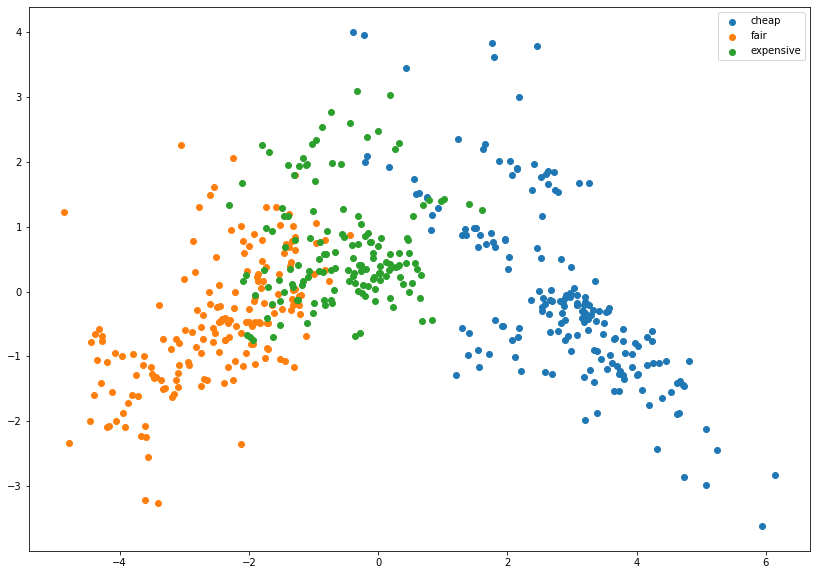

In [81]:
y_hat = gmm.predict(X)
X_2D = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots(figsize=(14,10))
for c in range(len(cn)):
    ax.scatter(X_2D[np.where(y_hat==c),0],X_2D[np.where(y_hat==c),1], label=cn[c])
plt.legend()
plt.show()

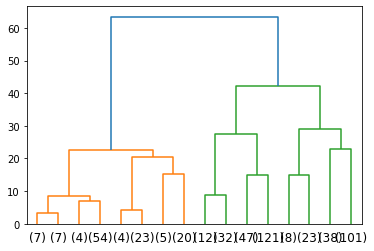

In [19]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(hc, truncate_mode="level", p=3)

# observando overfitting, underfitting e ajuste de hiperparâmetros

In [142]:
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.datasets import load_iris
# carregando dados pela biblioteca do scikit-learn
X, y = load_iris(return_X_y=True)
#X=X_train.to_numpy()
#y = pd.Categorical(y_train).codes

In [26]:
# observando a importância do tamanho da base de dados
sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
# MODELO 1
train_sizes, train_scores_model1, valid_scores_model1 = learning_curve(
    mod_lr,
    X, y,
    train_sizes=sizes,
    cv=5)
# MODELO 2
train_sizes, train_scores_model2, valid_scores_model2 = learning_curve(
    mod_svm,
    X, y,
    train_sizes=sizes,
    cv=5)
# MODELO 3
train_sizes, train_scores_model3, valid_scores_model3 = learning_curve(
    mod_dt,
    X, y,
    train_sizes=sizes,
    cv=5)

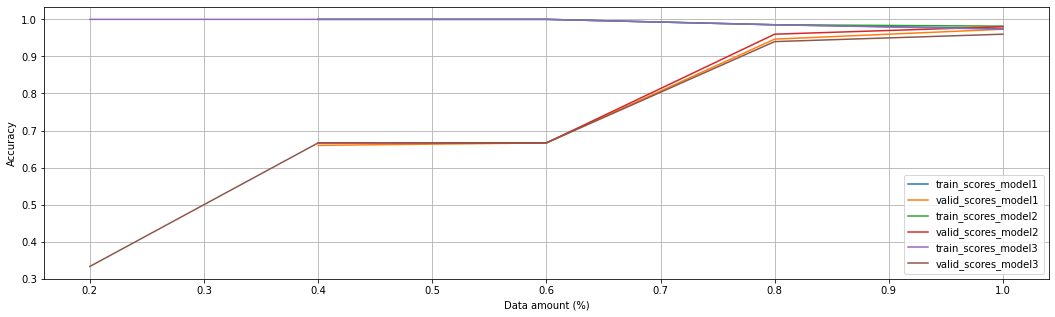

In [27]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(sizes,np.mean(train_scores_model1, axis=1))
ax.plot(sizes,np.mean(valid_scores_model1, axis=1))
ax.plot(sizes,np.mean(train_scores_model2, axis=1))
ax.plot(sizes,np.mean(valid_scores_model2, axis=1))
ax.plot(sizes,np.mean(train_scores_model3, axis=1))
ax.plot(sizes,np.mean(valid_scores_model3, axis=1))
plt.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
plt.grid()
plt.xlabel('Data amount (%)')
plt.ylabel('Accuracy')
plt.show()

In [28]:
# observando a importância do ajuste dos hiperparâmetros
train_scores_model1, valid_scores_model1 = validation_curve(
    mod_lr,
    X, y,
    param_name="C",
    param_range=np.linspace(0.1, 1, 10),
    cv=5)
train_scores_model2, valid_scores_model2 = validation_curve(
    mod_svm,
    X, y,
    param_name="C",
    param_range=np.linspace(0.1, 1, 10),
    cv=5)
train_scores_model3, valid_scores_model3 = validation_curve(
    mod_dt,
    X, y,
    param_name="min_weight_fraction_leaf",
    param_range=np.linspace(0, 0.1, 10),
    cv=5)

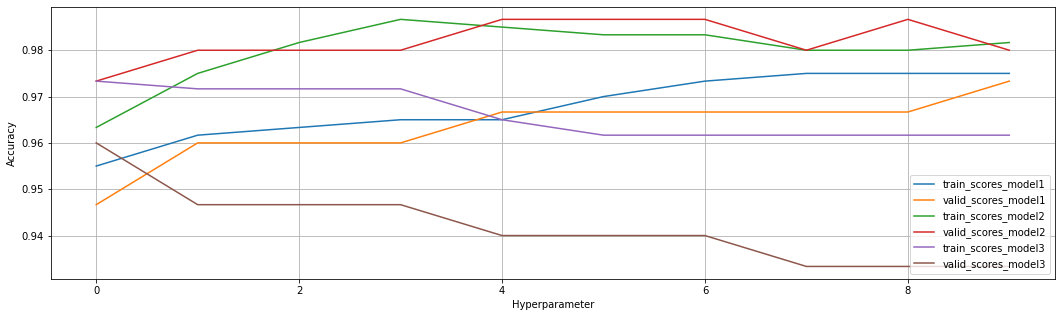

In [29]:
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(np.mean(train_scores_model1, axis=1))
ax.plot(np.mean(valid_scores_model1, axis=1))
ax.plot(np.mean(train_scores_model2, axis=1))
ax.plot(np.mean(valid_scores_model2, axis=1))
ax.plot(np.mean(train_scores_model3, axis=1))
ax.plot(np.mean(valid_scores_model3, axis=1))
plt.legend(['train_scores_model1',
            'valid_scores_model1',
            'train_scores_model2',
            'valid_scores_model2',
            'train_scores_model3',
            'valid_scores_model3'])
plt.grid()
plt.xlabel('Hyperparameter')
plt.ylabel('Accuracy')
plt.show()